<a href="https://colab.research.google.com/github/JoshuaK007/CSCFinal/blob/main/kimbrellGroupFinalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install joypy

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from joypy import joyplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
NYC_Accident_data = pd.read_csv('/content/drive/MyDrive/NYC Accidents 2020.csv')
data = NYC_Accident_data

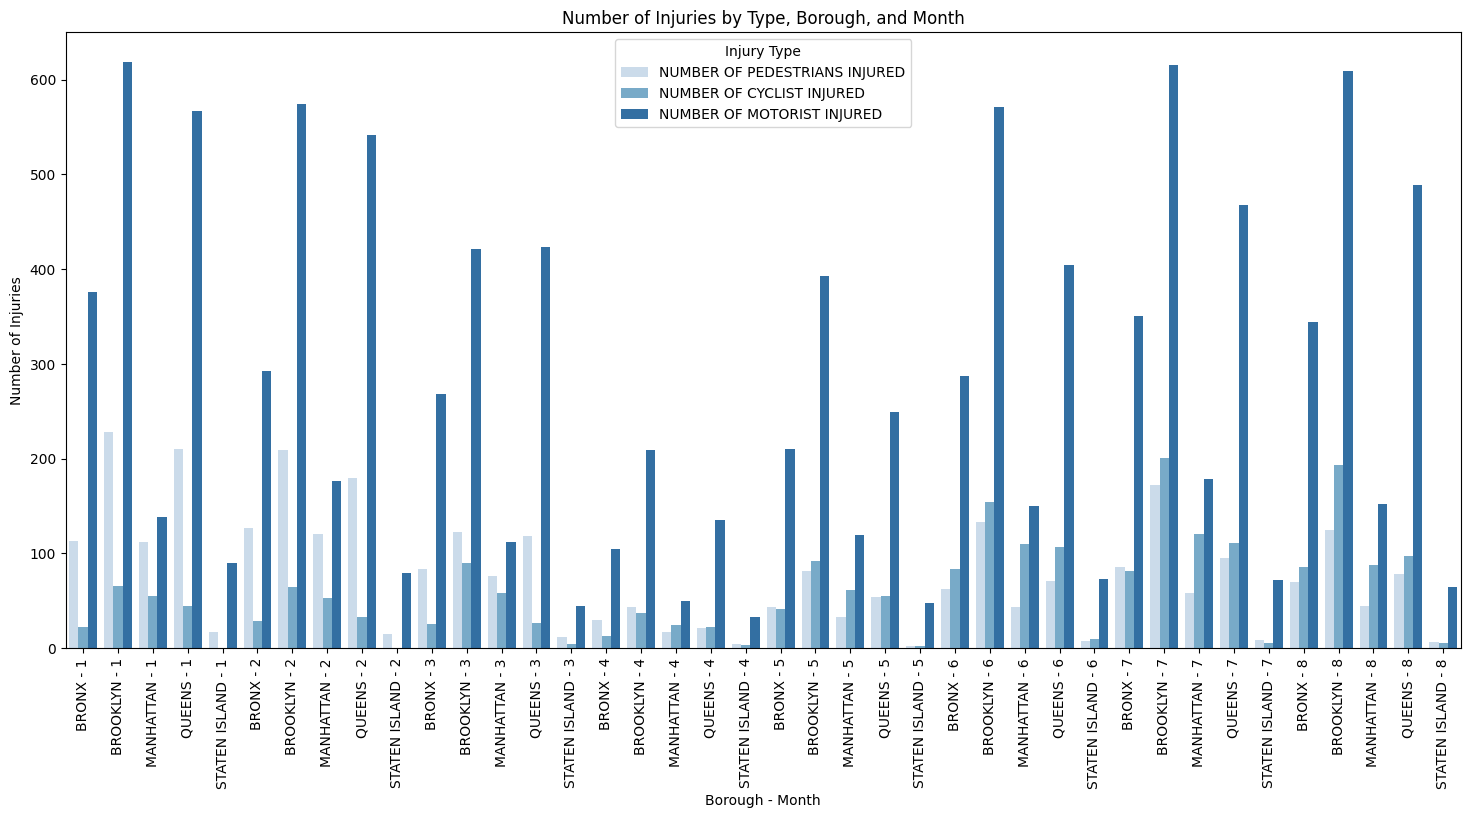

In [ ]:

data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['MONTH'] = data['CRASH DATE'].dt.month
injury_types = ['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED']
aggregated_data = data.groupby(['BOROUGH', 'MONTH'])[injury_types].sum().reset_index()
data_melted = aggregated_data.melt(id_vars=['BOROUGH', 'MONTH'], value_vars=injury_types, var_name='Injury Type', value_name='Count')
data_melted['Borough_Month'] = data_melted['BOROUGH'] + ' - ' + data_melted['MONTH'].astype(str)
data_melted = data_melted.sort_values(by=['MONTH', 'BOROUGH'])
plt.figure(figsize=(18, 8))
sns.barplot(data=data_melted, x='Borough_Month', y='Count', hue='Injury Type', palette="Blues")
plt.title('Number of Injuries by Type, Borough, and Month')
plt.xlabel('Borough - Month')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=90)
plt.legend(title='Injury Type')
plt.show()


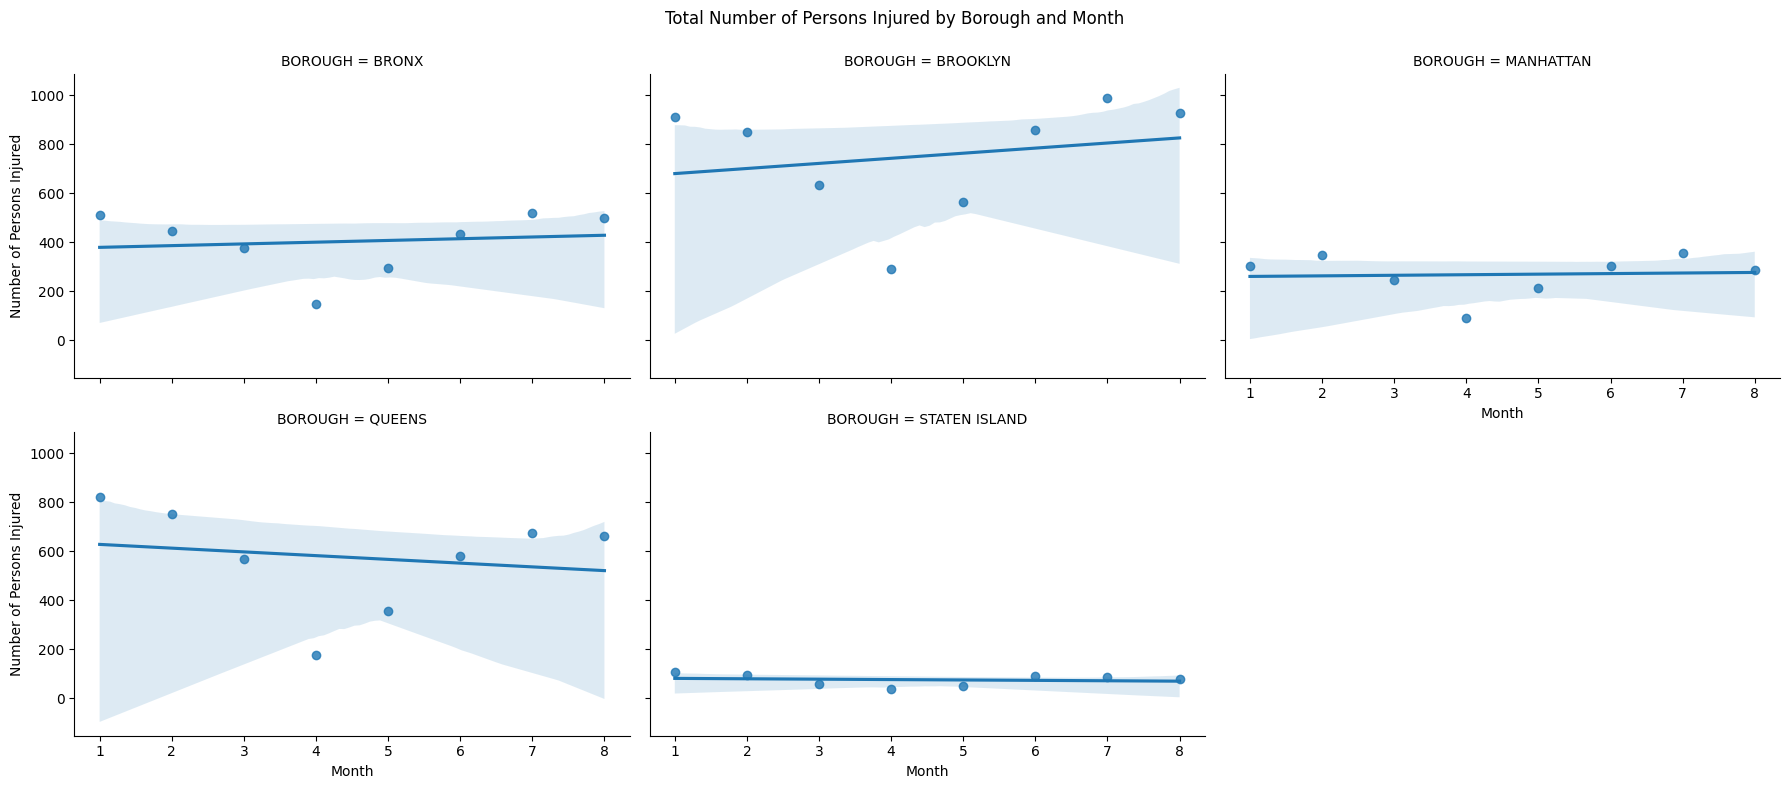

In [ ]:
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['MONTH'] = data['CRASH DATE'].dt.month
aggregated_data = data.groupby(['BOROUGH', 'MONTH'])['NUMBER OF PERSONS INJURED'].sum().reset_index()
g = sns.FacetGrid(aggregated_data, col='BOROUGH', col_wrap=3, height=4, aspect=1.5)
g.map(sns.regplot, 'MONTH', 'NUMBER OF PERSONS INJURED')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Total Number of Persons Injured by Borough and Month')
g.set_axis_labels('Month', 'Number of Persons Injured')
plt.show()

NYC Crash Data 2020 - Side by Side Bars (Quarterly)
https://public.tableau.com/app/profile/joshua.kimbrell/viz/NYCCrashData2020-SidebySideBarsQuarterly/NYCCrashData2020-SidebySideBarsQuarterly?publish=yes

NYC Crash Data 2020 - Area Charts (Discrete)
https://public.tableau.com/app/profile/joshua.kimbrell/viz/NYCCrashData2020-AreaChartsDiscrete/NYCCrashData2020-AreaChartsDiscrete?publish=yes

NYC Crash Data 2020 - Horizontal Stacked Bars
https://public.tableau.com/app/profile/joshua.kimbrell/viz/NYCCrashData2020-HorizontalStackedBars/NYCCrashData2020-HorizontalStackedBars?publish=yes